In [51]:
from evaluation.retrieval_evaluator import RankingEvaluator

qrels_path = "/home/jupyter/jointly_rec_and_search/datasets/rec_search/search_compl/qrels.test.tsv"
ranking_path_1 = "/home/jupyter/jointly_rec_and_search/experiments/search_compl/cl-drd/experiment_07-04_190815/runs/checkpoint_latest.test.run"
ranking_path_2 = "/home/jupyter/jointly_rec_and_search/experiments/search_compl/cl-drd/experiment_07-04_193509/runs/checkpoint_latest.test.run"
evaluator = RankingEvaluator(qrels_path, is_trec=False, show_progress_bar=True)
xs = evaluator.compute_metrics(ranking_path_1, return_per_query=True)
ys = evaluator.compute_metrics(ranking_path_2, return_per_query=True)

In [52]:
import numpy as np
ndcg_1 = xs[1][2][1]
ndcg_2 = ys[1][2][1]
diffs = ndcg_2 - ndcg_1
indices = np.argsort(diffs)

cutoff = 20
qidx_to_qid = xs[2]
qrels = xs[3]
largest_qids = [qidx_to_qid[int(idx)] for idx in indices[-cutoff:]]

smallest_qids = [qidx_to_qid[int(idx)] for idx in indices[:cutoff]]


In [53]:
queries_path = "/home/jupyter/jointly_rec_and_search/datasets/rec_search/search_compl/queries.test.tsv"
qid_to_query = {}
with open(queries_path) as fin:
    for line in fin:
        qid, query = line.rstrip().split("\t")
        qid_to_query[int(qid)] = query

In [55]:
for qid in largest_qids:
    print(qid, qid_to_query[qid], len(qrels[qid]))
print("-"*75)
print("; ".join([qid_to_query[qid] for qid in largest_qids[:5]]))
print("-"*75)
for qid in smallest_qids:
    print(qid, qid_to_query[qid], len(qrels[qid]))

25531 4 x 4 lumber 3
80979 dishwasher 2593008 2
145532 naptha 2
35340 75 gallon hot water heater 2
18033 2x6 16 ft 1
148827 osb roof sheathing 1
25671 4 x4 8ft treated joists 1
96367 flex glue black 1
114426 herschel hickory floor 1
226330 z515e 3
57569 bright white spray paint 1
34345 6x6x12 treated lumber 1
152564 over range microwave with exhaust white 1
190179 soaker hose 75ft 1
2488 1/2 pex coupler 1
21197 3/8-16 hex nut 1
131886 lg 26.2 french door 1
39180 ac filter 10x10x1 1
112768 harbor breeze ceiling fan 52 1
221154 window 71.5 x 59.5 1
---------------------------------------------------------------------------
4 x 4 lumber; dishwasher 2593008; naptha; 75 gallon hot water heater; 2x6 16 ft
---------------------------------------------------------------------------
125610 kobalt rail hooks 1
193862 stainless steel eye hook 1
86503 dyson animal 2 1
2141 1/2 hp water pump 1
81013 dishwasher bosch 500 1
17151 2x12x12ft pressure treated 1
112751 harbor breeze bradbury ceiling fans

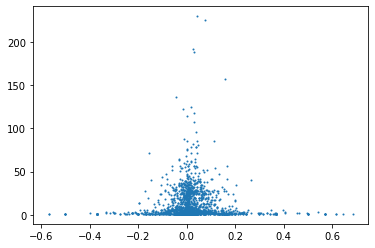

In [43]:
all_qids = [qidx_to_qid[int(idx)] for idx in indices]
all_lengths = [len(qrels[qid]) for qid in all_qids]
all_diffs = diffs[indices]

import matplotlib.pyplot as plt
plt.scatter(all_diffs, all_lengths, s=1)

In [41]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

sorted_qids = {qidx_to_qid[int(idx)] for idx in indices}
sorted_queries = [qid_to_query[qid] for qid in sorted_qids]
sorted_lengths = []

start_idx = 0
bz = 32
while start_idx <= len(sorted_queries):
    mask = tokenizer(sorted_queries[start_idx:start_idx+bz],padding=True, truncation='longest_first', return_tensors="pt")["attention_mask"]
    sorted_lengths += mask.sum(dim=-1).tolist()
    start_idx += bz

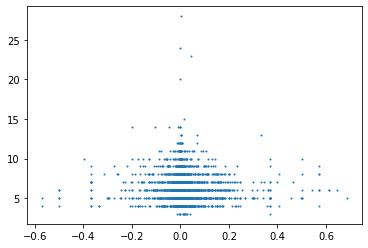

In [42]:
plt.scatter(all_diffs, sorted_lengths, s=1)

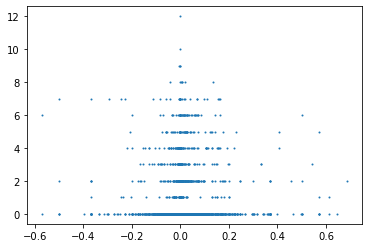

In [47]:
sorted_qids = {qidx_to_qid[int(idx)] for idx in indices}
sorted_queries = [qid_to_query[qid] for qid in sorted_qids]
sorted_lengths = []

start_idx = 0
bz = 32
for query in sorted_queries:
    sorted_lengths.append(sum([char.isdigit() for char in query]))
    
plt.scatter(all_diffs, sorted_lengths, s=1)